In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load data
head = open("header.txt","r").read().split(",\n")[:-1]
data= pd.read_csv("data.csv",names=head)

# Data Exploration

In [2]:
# is there any null values?
print(data.isnull().values.any())
# there is, how many are null?
print(data.isnull().sum())
# only null values in CPL_wrt_self


True
CPL_wrt_BC         0
client_state       0
duration           0
num_prods          0
calls              0
CPL_wrt_self    1092
churn              0
avg_budget         0
BC                 0
clicks             0
dtype: int64


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CPL_wrt_BC      10000 non-null float64
client_state    10000 non-null object
duration        10000 non-null int64
num_prods       10000 non-null int64
calls           10000 non-null int64
CPL_wrt_self    8908 non-null float64
churn           10000 non-null int64
avg_budget      10000 non-null float64
BC              10000 non-null object
clicks          10000 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 781.3+ KB


count    10000.000000
mean        -0.068958
std          0.491693
min         -0.994590
25%         -0.103273
50%         -0.088810
75%         -0.048530
max         19.088412
Name: CPL_wrt_BC, dtype: float64


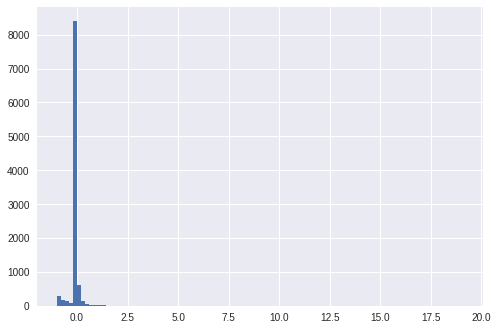

In [4]:

# look at each series
print(data["CPL_wrt_BC"].describe())
data["CPL_wrt_BC"].hist(bins = 100)
plt.show()


In [5]:
# locations
print(data["client_state"].value_counts())


CA    1745
TX     895
FL     746
NY     658
PA     564
IL     546
MD     380
GA     345
NJ     343
WA     315
VA     314
MA     299
OH     288
CO     278
AZ     278
MO     185
NC     183
OR     144
MN     137
IN     128
MI     110
TN      96
WI      90
LA      84
NV      66
SC      63
ME      54
CT      54
NH      53
UT      52
KS      51
AL      47
DC      42
RI      41
IA      40
MS      38
OK      36
KY      34
NE      29
DE      27
ID      23
AR      18
HI      18
SD      15
MT      10
AK      10
NM      10
VT       8
ND       6
WV       3
WY       1
Name: client_state, dtype: int64


count    10000.000000
mean        27.669200
std         25.500847
min          1.000000
25%          6.000000
50%         19.000000
75%         42.000000
max        118.000000
Name: duration, dtype: float64


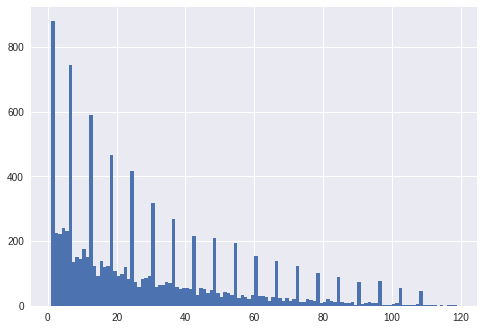

In [6]:
# duration
print(data["duration"].describe())
data["duration"].hist(bins=range(1,120))
plt.show() # spike every 6 months


In [7]:
# number of products
print(data["num_prods"].describe())
data["num_prods"].hist(bins = range(1,12))
print(data["num_prods"].value_counts())


count    10000.000000
mean         1.327200
std          0.816582
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         11.000000
Name: num_prods, dtype: float64
1     7875
2     1319
3      431
4      171
5       93
0       64
6       24
7       17
8        3
11       1
10       1
9        1
Name: num_prods, dtype: int64


In [8]:
# calls. Getting a weird histogram
print(data["calls"].value_counts())


6    1047
2    1039
4    1018
9    1017
8    1014
3     999
5     997
1     967
0     957
7     945
Name: calls, dtype: int64


In [9]:
# budget
print(data["avg_budget"].describe())


count     10000.000000
mean       1512.601132
std        3473.160720
min           9.090909
25%         476.056955
50%         907.839383
75%        1666.499256
max      148555.594376
Name: avg_budget, dtype: float64


In [10]:
# business category
print(data["BC"].value_counts())


Home & Home Improvement                         2610
Shopping, Collectibles & Gifts (General)         736
Automotive -- Repair, Service & Parts            624
Automotive -- For Sale                           516
Travel                                           512
Physicians & Surgeons                            505
Health & Fitness                                 499
Personal Services (Weddings, Cleaners, etc.)     475
Education & Instruction                          447
Attorneys & Legal Services                       415
Business Services                                389
Industrial & Commercial                          286
Furniture                                        281
Real Estate                                      280
Sports & Recreation                              259
Animals & Pets                                   221
Dentists & Dental Services                       218
Beauty & Personal Care                           196
Restaurants & Food                            

count    10000.000000
mean        99.214900
std         31.701757
min         13.000000
25%         76.000000
50%         96.000000
75%        119.000000
max        253.000000
Name: clicks, dtype: float64


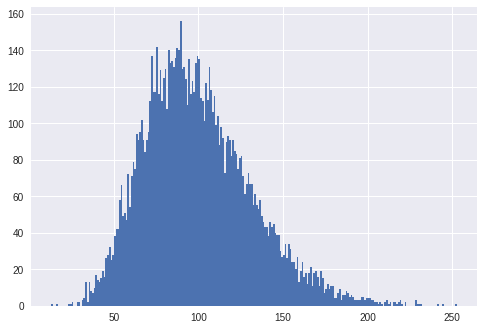

NormaltestResult(statistic=665.73374347397748, pvalue=2.7400241853960254e-145)


In [15]:
# clicks
print ( data["clicks"].describe())
data["clicks"].hist(bins = range(13,254))
plt.show()

import scipy as sc
print(sc.stats.normaltest(data["clicks"])) # smaller than 


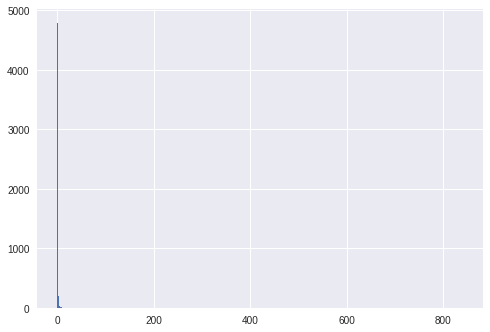

In [14]:
# CPL_wrt_self. have a bunch of nans here, need to deal with them.
data["CPL_wrt_self"].dropna().hist(bins=1000)
plt.show()


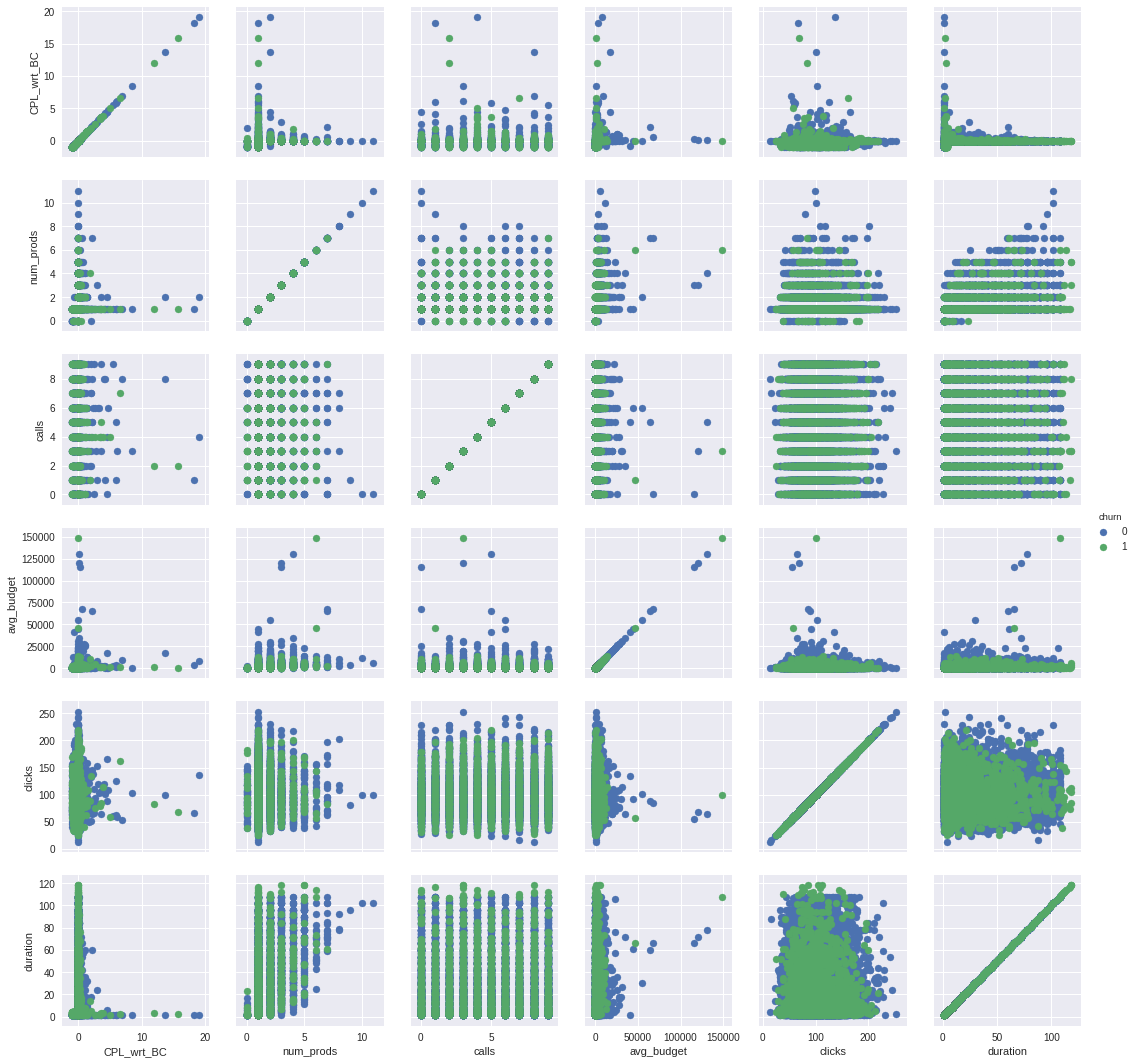

In [29]:
# looking at churn. Plot with colours denoting 0 or 1
# numerical data: 
num_cols=["CPL_wrt_BC","num_prods","calls","avg_budget","clicks","duration"]
g=sns.PairGrid(data,vars=num_cols,hue="churn")
g.map(plt.scatter)
g.add_legend()
plt.show()

In [171]:
corr_matrix=data.corr()
corr_matrix["churn"]

CPL_wrt_BC     -0.000140
duration       -0.090849
num_prods      -0.047273
calls          -0.000630
CPL_wrt_self   -0.018370
churn           1.000000
avg_budget     -0.039633
clicks          0.002746
Name: churn, dtype: float64

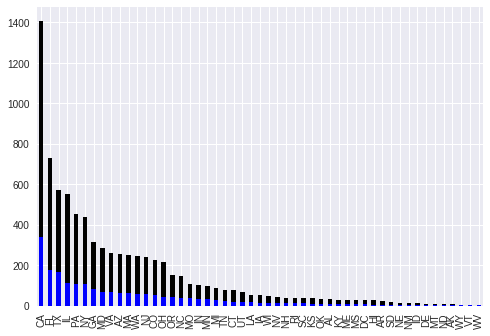

In [132]:
# can see no discernable trends for churn number, i.e. no obvious way to cluster the two churn numbers.
data[data["churn"]==0]["client_state"].value_counts().plot(kind='bar',color='black')
data[data["churn"]==1]["client_state"].value_counts().plot(kind='bar',color='b')
plt.show()
# no real trend for state

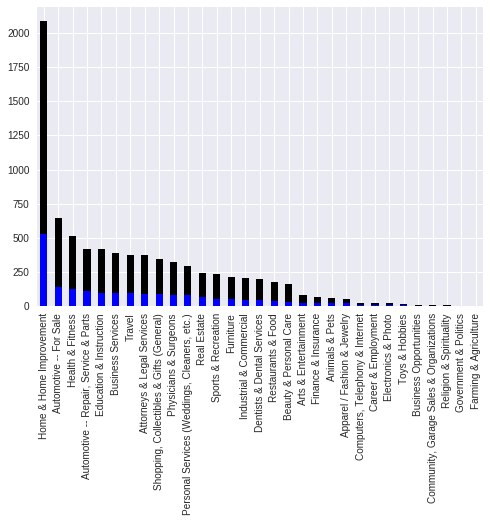

In [133]:
data[data["churn"]==0]["BC"].value_counts().plot(kind='bar',color='black')
data[data["churn"]==1]["BC"].value_counts().plot(kind='bar',color='b')
plt.show()
# not much of a trend

## Break data up into test/train sets.

In [19]:
# want to build a model to determine the churn number. 
# will transform the location and BC into numbers using hot-encoder. 
# have to deal with the nan's in CPL_wrt_self
# without nan have 8908 entries. will make a new column that signifies if the value is missing or not. Also will replace the nan values with something, maybe mean?

# add a new column that 
def transform_data(in_data):
    transformed = in_data.copy()
    transformed["CPL_wrt_self_null"] = in_data["CPL_wrt_self"].isnull()
    transformed["CPL_wrt_self"]=in_data["CPL_wrt_self"].fillna(in_data["CPL_wrt_self"].dropna().mean()) # mean

    transformed = pd.concat([transformed, pd.get_dummies(in_data["client_state"]), pd.get_dummies(in_data["BC"])] , axis = 1)
    # drop original client_state and BC columns 
    transformed=transformed.drop(["BC","client_state"],axis=1)
    target_labels= transformed["churn"]
    input_vals = transformed.loc[:,transformed.columns !="churn"]
    return input_vals,target_labels

in_vals,target=transform_data(data)

In [204]:
# split data into test/train. What percentage to use?

# random test/train:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# vanilla random forest with different test statistic
for ts in np.arange(0.5,1,0.1):
    X_train, X_test, y_train, y_test = train_test_split(in_vals, target, test_size=1-ts)
    # vanilla RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=100)
    forest.fit(X_train,y_train)
    print(ts,forest.score(X_test,y_test), forest.score(X_train,y_train))
# getting similar results, do a 80/20 split

(0.5, 0.82820000000000005, 1.0)
(0.59999999999999998, 0.82325000000000004, 1.0)
(0.69999999999999996, 0.817727424191936, 1.0)
(0.79999999999999993, 0.82258870564717645, 1.0)
(0.89999999999999991, 0.85114885114885119, 1.0)


## Here we see that the out-of-nox RandomForestClassifer has a score of about 82%. Note that the score represents the fraction of correct predictions made by the model. A score of 1 is a perfect model. Will stick with a split of 80/20


# Testing different out-of-box classifiers

In [209]:
X_train, X_test, y_train, y_test = train_test_split(in_vals, target, test_size=0.2)

print(len(X_train),len(X_test)) # sanity check!

#look at all the different classifiers
import time 
from sklearn.decomposition import PCA
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# define the different classifiers I want to look at.
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
}

def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):
    """
    This method, takes as input the X, Y matrices of the Train and Test set.
    And fits them on all of the Classifiers specified in the dict_classifier.
    """
    
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models



def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'train_score'] = training_s[ii]
        df_.loc[ii, 'test_score'] = test_s[ii]
        df_.loc[ii, 'train_time'] = training_t[ii]
    
    print(df_.sort_values(by=sort_by, ascending=False))
    
    
    
dict_models = batch_classify(X_train, y_train, X_test, y_test, no_classifiers = 8)
display_dict_models(dict_models)   

(8000, 2000)
trained Random Forest in 49.72 s
trained Nearest Neighbors in 0.16 s
trained Logistic Regression in 0.60 s
trained Linear SVM in 26.60 s
            classifier  train_score  test_score  train_time
1        Random Forest     1.000000      0.8325   49.715066
0  Logistic Regression     0.798250      0.8065    0.600135
3           Linear SVM     0.902375      0.7980   26.600004
2    Nearest Neighbors     0.818625      0.7730    0.159997


## Will continue with a random forest. An excellent property of these is an estimation of feature importance which we will address later.

## What about guessing '0' for churn all the time? Earlier we saw about 80% of  churn values are 0.

In [205]:
# what about guessing 0 all the time? this accounts for nearly all of the entries?
a=[1-x for x in y_train]
b=[1-x for x in y_test]
print("Always guessing 0: Train_score: %s, Test_score:%s"%(float(sum(a))/len(a),float(sum(b))/len(b)))
# see it is effectively same as Random Forest. 

# lets tune random forest, see if we get better than 0.8 reliably

Always guessing 0: Train_score: 0.798199799978, Test_score:0.816183816184


## Good score, however this approach does not offer any insight into the system. Back to random forest.

In [210]:
forest=RandomForestClassifier(n_estimators=1000,criterion="gini",max_depth=None)
forest.fit(X_train,y_train)
print("Train Score: %s, Test Score: %s" %(forest.score(X_train,y_train),forest.score(X_test,y_test)))
print('Parameters currently in use:\n')
print(forest.get_params())

Train Score: 1.0, Test Score: 0.8315
Parameters currently in use:

{'warm_start': False, 'oob_score': False, 'n_jobs': None, 'min_impurity_decrease': 0.0, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 1000, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': None, 'max_features': 'auto', 'max_depth': None, 'class_weight': None}


## Score of 0.8315. We will try improve this and look closely at its metrics further down.

In [211]:
# what are the most important feature
for x,score in enumerate(forest.feature_importances_):
    print (in_vals.keys()[x],score)
    
# can see locations are not too important. Lets look at just 
#['CPL_wrt_BC,'duration','num_prods','calls','CPL_wrt_self','avg_budget','clicks']

('CPL_wrt_BC', 0.12995901056113274)
('duration', 0.13199129026670048)
('num_prods', 0.018395391776262062)
('calls', 0.063535376326879403)
('CPL_wrt_self', 0.13998306806316091)
('avg_budget', 0.12044011111138989)
('clicks', 0.098937833588259361)
('CPL_wrt_self_null', 0.0089735431493019619)
('AK', 0.00019426268427314808)
('AL', 0.0017335620592539062)
('AR', 0.00070466288626819056)
('AZ', 0.0052607542471106716)
('CA', 0.013064346094089799)
('CO', 0.00506527031620804)
('CT', 0.0029562836512969444)
('DC', 0.0011510559969438174)
('DE', 0.00058259015078788046)
('FL', 0.0091626216894762341)
('GA', 0.0067795646218503629)
('HI', 0.00033739999676817267)
('IA', 0.0013325992228264698)
('ID', 0.00074000584692116109)
('IL', 0.0078605434852432338)
('IN', 0.0026977555209740586)
('KS', 0.0014665715402820288)
('KY', 0.0010885541147350427)
('LA', 0.0018031427225772105)
('MA', 0.0052767367700538286)
('MD', 0.0064534865332408434)
('ME', 0.00091022655309989887)
('MI', 0.003362784558008603)
('MN', 0.002996225

Above we see that the most important features are displayed at the top, the client state and business categories do not play as important a role as other features.

By removing the states and BC will we improve results?

In [215]:
def cut_data(in_data):
    """
    This function takes in the  raw data and returns a new pandas data frame without the BC and client_state columns
    """
    transformed = in_data.copy()
    transformed["CPL_wrt_self"]=in_data["CPL_wrt_self"].fillna(in_data["CPL_wrt_self"].dropna().mean()) # mean
    # drop original client_state and BC columns 
    transformed=transformed.drop(["BC","client_state"],axis=1)
    target_labels= transformed["churn"]
    input_vals = transformed.loc[:,transformed.columns !="churn"]
    return input_vals,target_labels

cut_vals,cut_target=cut_data(data)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cut_vals, cut_target, test_size=0.2)

In [217]:
cut_forest=RandomForestClassifier(n_estimators=1000,criterion="gini",max_depth=None)
cut_forest.fit(Xc_train,yc_train)
print("Train Score: %s, Test Score: %s" %(cut_forest.score(Xc_train,yc_train),cut_forest.score(Xc_test,yc_test)))

Train Score: 1.0, Test Score: 0.8085


This model does worse on the test data. Conclusion: keep states and BC's.

# Confusion matrix 
back to the original random forest.

In [222]:
# remind ourselves of the randomforests performance
base_rf_train_score = forest.score(X_train,y_train) 
base_rf_test_score =forest.score(X_test,y_test)
print("Train set score: %s, Test set score: %s"%(base_rf_train_score,base_rf_test_score))

Train set score: 1.0, Test set score: 0.8315


Here we see that the forest overfits the training data, i.e. it perfectly classifies all 8000 entries in the training data-set. It scores 0.8315 on the Test data-set. This is slightly better than guessing '0' for churn number all of the time. Lets look at the confusion matrix to understand the mis-classifications.

In [225]:
from sklearn.metrics import confusion_matrix
predicted_churn=forest.predict(X_test)
cm = confusion_matrix(y_test,predicted_churn)
print(cm)

[[1584   29]
 [ 308   79]]


Top row corresponds to churn=0 entries. 1584 were correctly predicted as 0 by the model (True Negative), 29 were incorrectly predicted as 1 (False positives). 
The bottom row corresponds to churn = 1 entries. 79 were correctly predicted as churn=1 (True Positive), 308 were incorrectly predicted as churn =0 (false negatives).
Lets look at the precision and recall.

In [226]:
from sklearn.metrics import precision_score, recall_score
prec = precision_score(y_test,predicted_churn)
rec = recall_score(y_test,predicted_churn)
print(prec,rec)

(0.73148148148148151, 0.20413436692506459)


precision is ~ 73%, i.e. when a churn=1 is predicted it is correct 73% of time. However, recall is not good at 20%, it only detects about 20% of the churn=1 cases. There is a tradeoff between precision and recall. 
Depending on the business aims we can tune this, favouring a higher recall rate and lower precision.

In [241]:
predicted_prob = forest.predict_proba(X_test)

for x in range(20):
    print( list(predicted_prob[x]), list(y_test)[x])

([0.85699999999999998, 0.14299999999999999], 0)
([0.879, 0.121], 0)
([0.58799999999999997, 0.41199999999999998], 1)
([0.71199999999999997, 0.28799999999999998], 0)
([0.83699999999999997, 0.16300000000000001], 1)
([0.95699999999999996, 0.042999999999999997], 0)
([0.82699999999999996, 0.17299999999999999], 0)
([0.70899999999999996, 0.29099999999999998], 0)
([0.86699999999999999, 0.13300000000000001], 0)
([0.96599999999999997, 0.034000000000000002], 0)
([0.90800000000000003, 0.091999999999999998], 0)
([0.83099999999999996, 0.16900000000000001], 1)
([0.82999999999999996, 0.17000000000000001], 0)
([0.55800000000000005, 0.442], 1)
([0.73499999999999999, 0.26500000000000001], 0)
([0.69499999999999995, 0.30499999999999999], 0)
([0.89600000000000002, 0.104], 0)
([0.80100000000000005, 0.19900000000000001], 0)
([0.82699999999999996, 0.17299999999999999], 0)
([0.45300000000000001, 0.54700000000000004], 1)


Here we can see some misclassifications, i.e. the 3rd row places a higher weight on the churn=0 at 58.8% (leftmost column) and 41.2% for churn =1. If a probability for churn=1 is above a threshold, 50% at the moment, it is classified as churn=1. We can change this threshold.

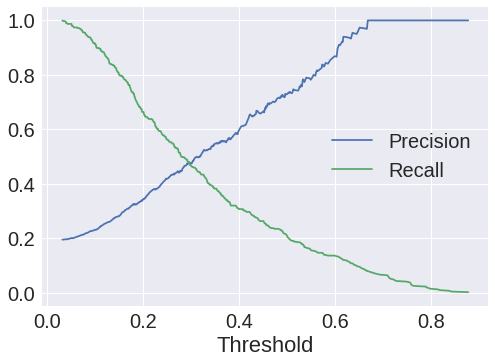

In [277]:
from sklearn.metrics import precision_recall_curve
churn1_scores=predicted_prob[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, churn1_scores)
plt.plot(thresholds,precision[:-1],label="Precision")
plt.plot(thresholds,recall[:-1],label="Recall")
plt.legend(loc="center right")
plt.xlabel("Threshold")
sns.set(font_scale=1)
plt.show()

By changing the threshold we could increase the recall but decrease the Precision. This tuning would be carried out according to the business needs.
Below is the ROC curve which visualizes the trade-off between false postives and true postives according to changing thresholds. 

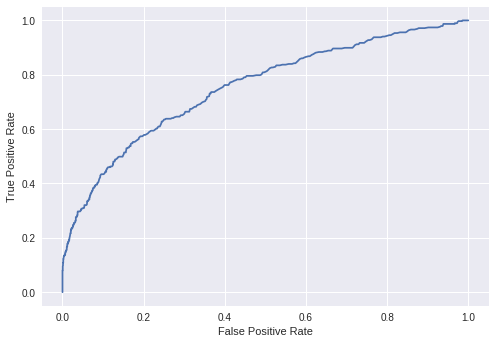

In [278]:
from sklearn.metrics import roc_curve
churn1_scores=predicted_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test,churn1_scores)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

# Optimizing random forest parameters
one should tune the parameters being used for the random forest. This takes a while to run on my machnine and I was not able to investigate as wide a parameter space I would like with the time I have, I'll leave it here as a 'future work'

In [165]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100,300,600]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [50,75,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_search=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=random_grid,n_iter=500,verbose=1,n_jobs=-1,cv=2)
rf_search.fit(X_train, y_train)


Fitting 2 folds for each of 500 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 19.3min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=500, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4, 8], 'n_estimators': [100, 300, 600], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [50, 75, 100, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)